In [133]:
from citipy import citipy
import pandas as pd
import random
import matplotlib.pyplot as plt

In [120]:
#set seed for reprodicibility
seed = random.seed(123)
seed

Coordinates should be uniformly distributed along each axis. 

In [121]:
lons = [random.uniform(-180, 180) for i in range(500)]
lats = [random.uniform(-90, 90) for i in range(500)]
coords = list(zip(lats,lons))
coords

[(-61.8866490277948, -161.14910441366004),
 (25.888267714967554, -148.61279609185237),
 (-72.24991458599924, -33.3929650786566),
 (38.5066107596227, -141.22791542216194),
 (60.74104707033089, 144.43159606261008),
 (53.49100300389284, -166.26468020316395),
 (68.93141109533343, 13.0327344122137),
 (20.74766910955762, -60.40882853651526),
 (-29.923421597902077, 126.7511828145727),
 (-57.16072711552717, -122.52153718009083),
 (28.41345871125729, -58.60200344066082),
 (85.36694852377678, -59.833297933576105),
 (28.453725743716618, -91.74119309366),
 (-71.29212039920749, -179.39860071147976),
 (-82.16906250358635, -22.94071437052139),
 (-62.597410543467674, -148.45914008984778),
 (54.52097248966908, 35.13580721567658),
 (-65.5310523452591, -154.84429387469433),
 (37.066501371849014, -66.43476945508921),
 (15.071292626509717, -18.60418500950027),
 (-24.337647767221966, 145.94351482241962),
 (-14.255711979847945, -146.60475790374176),
 (-42.6251234780178, -128.81697680465962),
 (-16.0246044991

In [131]:
geo_data = []
for lat, lon in coords:
    city = citipy.nearest_city(lat,lon)
    geo_data.append({'City':city.city_name.title(),'Country':city.country_code.upper(), 'Lat':lat, 'Lon':lon})
geo_df = pd.DataFrame(geo_data)
geo_df

,City,Country,Lat,Lon
0,Mataura,PF,-61.886649,-161.149104
1,Hilo,US,25.888268,-148.612796
2,Ushuaia,AR,-72.249915,-33.392965
3,Fortuna,US,38.506611,-141.227915
4,Okhotsk,RU,60.741047,144.431596
5,Bethel,US,53.491003,-166.264680
6,Gravdal,NO,68.931411,13.032734
7,Codrington,AG,20.747669,-60.408829
8,Esperance,AU,-29.923422,126.751183
9,Rikitea,PF,-57.160727,-122.521537


In [163]:
lat_bins = list(range(-90,91,10))
lon_bins = list(range(-180,181,20))
geo_df['Lat Bin'] = pd.cut(geo_df['Lat'],lat_bins)
geo_df['Lon Bin'] = pd.cut(geo_df['Lon'], lon_bins)
geo_df

,City,Country,Lat,Lon,Lat Bin,Lon Bins,Lon Bin
0,Mataura,PF,-61.886649,-161.149104,"(-70, -60]","(-180, -160]","(-180, -160]"
1,Hilo,US,25.888268,-148.612796,"(20, 30]","(-160, -140]","(-160, -140]"
2,Ushuaia,AR,-72.249915,-33.392965,"(-80, -70]","(-40, -20]","(-40, -20]"
3,Fortuna,US,38.506611,-141.227915,"(30, 40]","(-160, -140]","(-160, -140]"
4,Okhotsk,RU,60.741047,144.431596,"(60, 70]","(140, 160]","(140, 160]"
5,Bethel,US,53.491003,-166.264680,"(50, 60]","(-180, -160]","(-180, -160]"
6,Gravdal,NO,68.931411,13.032734,"(60, 70]","(0, 20]","(0, 20]"
7,Codrington,AG,20.747669,-60.408829,"(20, 30]","(-80, -60]","(-80, -60]"
8,Esperance,AU,-29.923422,126.751183,"(-30, -20]","(120, 140]","(120, 140]"
9,Rikitea,PF,-57.160727,-122.521537,"(-60, -50]","(-140, -120]","(-140, -120]"


In [155]:
lat_group = pd.DataFrame(geo_df.groupby('Lat Bin')['City'].count())
lat_group = lat_group.rename(columns = {'City':'# of Cities'})
lat_group

,# of Cities
Lat Bin,
"(-90, -80]",23
"(-80, -70]",25
"(-70, -60]",32
"(-60, -50]",30
"(-50, -40]",29
"(-40, -30]",23
"(-30, -20]",32
"(-20, -10]",36
"(-10, 0]",30


The histograms below demonstrate that the latitudes and longitudes individually are reasonably uniformly distributed. There are some peaks and valleys, but for the purposes of this analysis, these distributions are close enough to uniform.

(array([23., 25., 32., 30., 29., 23., 32., 36., 30., 21., 29., 44., 29.,
        27., 17., 19., 25., 29.]),
 array([-90, -80, -70, -60, -50, -40, -30, -20, -10,   0,  10,  20,  30,
         40,  50,  60,  70,  80,  90]),
 <a list of 18 Patch objects>)

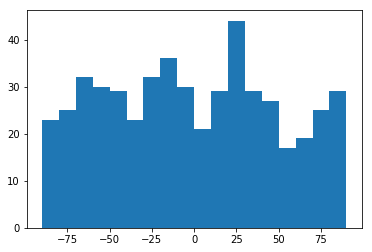

In [161]:
plt.hist(geo_df['Lat'],lat_bins)

(array([30., 42., 28., 30., 24., 23., 34., 32., 21., 30., 24., 23., 20.,
        26., 34., 25., 32., 22.]),
 array([-180, -160, -140, -120, -100,  -80,  -60,  -40,  -20,    0,   20,
          40,   60,   80,  100,  120,  140,  160,  180]),
 <a list of 18 Patch objects>)

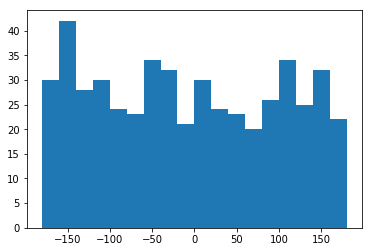

In [162]:
plt.hist(geo_df['Lon'],lon_bins)

The following scatter plot shows that the latitude and longitude pairs are well distributed. There appears to be small clumps in some area, but for the purposes of this analysis, this distribution is sufficiently uniform.

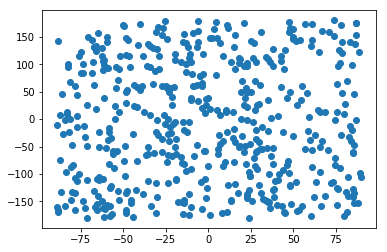

In [165]:
plt.scatter(geo_df['Lat'],geo_df['Lon'])